### 二分类模型
$f(x) = sign(w\cdot x + b)$

$\operatorname{sign}(x)=\left\{\begin{array}{ll}{+1,} & {x \geqslant 0} \\ {-1,} & {x<0}\end{array}\right.$

给定训练集：

$T=\left\{\left(x_{1}, y_{1}\right),\left(x_{2}, y_{2}\right), \cdots,\left(x_{N}, y_{N}\right)\right\}$

定义感知机的损失函数 

$L(w, b)=-\sum_{x_{i} \in M} y_{i}\left(w \cdot x_{i}+b\right)$

![image-20200303103035121](img\image-20200303103035121.png)

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline
import logging

In [2]:
# load data
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target

In [3]:
df.columns = [
    'sepal length', 'sepal width', 'petal length', 'petal width', 'label'
]
df.label.value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

In [4]:
df

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


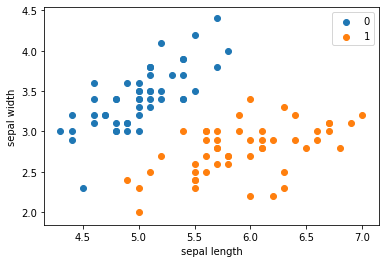

In [5]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [10]:
data = np.array(df.iloc[:100, [0, 1, -1]])

In [11]:
X, y = data[:,:-1], data[:,-1]
y = np.array([1 if i == 1 else -1 for i in y])

In [35]:
class Percerptron(object):
    def __init__(self,
                 data,
                max_iter = 1000):
        self.w = np.ones(len(data[0]) - 1, dtype=np.float32)
        self.b = 0
        self.lr = 0.1
        self.max_iter = max_iter
        
    def sign(self, x, w, b):
        y = np.dot(w, x) + b
        return y
    
    def fit(self, X_train, y_train):
        is_wrong = False
        n_iter = 0
        while not is_wrong:
            wrong_count = 0
            n_iter += 1
            for i in range(len(X_train)):
                X = X_train[i]
                y = y_train[i]
                if y * self.sign(X, self.w, self.b) <= 0:
                    self.w = self.w + self.lr * np.dot(y, X)
                    self.b = self.b + self.lr * y
                    wrong_count += 1
            if not n_iter % 10: 
                print("w:{}\tb:{:.2}\titer:{}\twrong_count:{}".format(self.w, self.b, n_iter,wrong_count))
            if not wrong_count:
                is_wrong = True
    def score(self):
        pass
            
            

In [36]:
perceptron = Percerptron(data)
perceptron.fit(X, y)

w:[ 0.95 -0.52]	b:-0.4	iter:10	wrong_count:2
w:[ 1.29 -1.52]	b:-0.7	iter:20	wrong_count:3
w:[ 2.04 -2.24]	b:-0.8999999999999999	iter:30	wrong_count:2
w:[ 2.46 -2.98]	b:-1.0999999999999999	iter:40	wrong_count:2
w:[ 2.84 -3.67]	b:-1.3	iter:50	wrong_count:2
w:[ 3.17 -4.16]	b:-1.5000000000000002	iter:60	wrong_count:2
w:[ 3.47 -4.53]	b:-1.8000000000000005	iter:70	wrong_count:2
w:[ 3.68 -4.91]	b:-2.0000000000000004	iter:80	wrong_count:2
w:[ 3.63 -5.41]	b:-2.3000000000000007	iter:90	wrong_count:3
w:[ 4.02 -5.62]	b:-2.400000000000001	iter:100	wrong_count:2
w:[ 4.29 -5.92]	b:-2.500000000000001	iter:110	wrong_count:2
w:[ 4.36 -6.18]	b:-2.800000000000001	iter:120	wrong_count:2
w:[ 4.34 -6.6 ]	b:-3.0000000000000013	iter:130	wrong_count:3
w:[ 4.72 -6.71]	b:-3.1000000000000014	iter:140	wrong_count:2
w:[ 4.64 -7.16]	b:-3.2000000000000015	iter:150	wrong_count:3
w:[ 5.06 -7.27]	b:-3.2000000000000015	iter:160	wrong_count:2
w:[ 5.2  -7.53]	b:-3.3000000000000016	iter:170	wrong_count:2
w:[ 5.42 -7.69]	b:-3

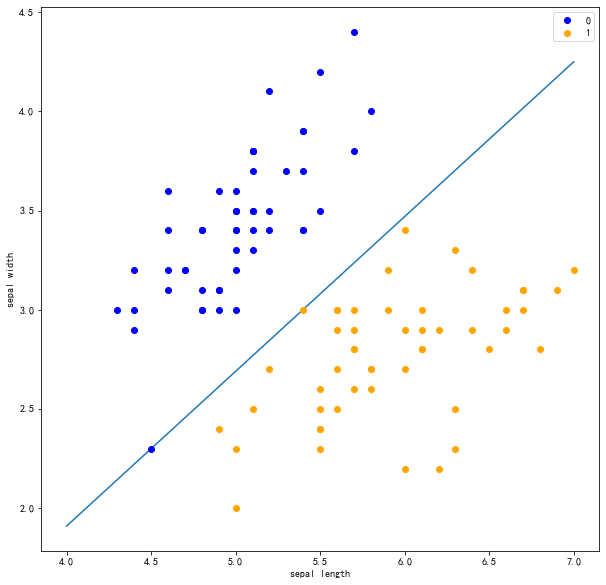

In [44]:
x_points = np.linspace(4, 7, 10)
y_ = -(perceptron.w[0] * x_points + perceptron.b) / perceptron.w[1]
plt.figure(figsize=(10,10))
plt.plot(x_points, y_)

plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

### scikit-learn实例

In [38]:
import sklearn
from sklearn.linear_model import Perceptron

In [39]:
sklearn.__version__

'0.22.1'

In [40]:
clf = Perceptron(fit_intercept=True, 
                 max_iter=1000, 
                 shuffle=True)
clf.fit(X, y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [41]:
# Weights assigned to the features.
print(clf.coef_)

[[ 23.2 -38.7]]


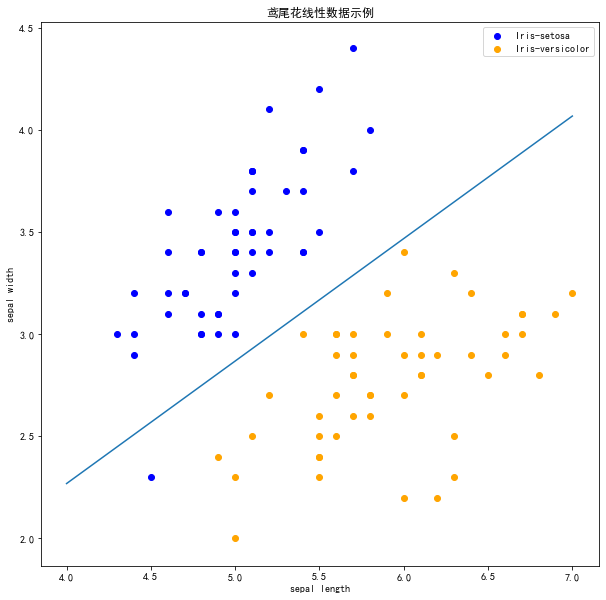

In [42]:
# 画布大小
plt.figure(figsize=(10,10))

# 中文标题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.title('鸢尾花线性数据示例')

plt.scatter(data[:50, 0], data[:50, 1], c='b', label='Iris-setosa',)
plt.scatter(data[50:100, 0], data[50:100, 1], c='orange', label='Iris-versicolor')

# 画感知机的线
x_ponits = np.arange(4, 8)
y_ = -(clf.coef_[0][0]*x_ponits + clf.intercept_)/clf.coef_[0][1]
plt.plot(x_ponits, y_)

# 其他部分
plt.legend()  # 显示图例
plt.grid(False)  # 不显示网格
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

**注意 !**

在上图中，有一个位于左下角的蓝点没有被正确分类，这是因为 SKlearn 的 Perceptron 实例中有一个`tol`参数。

`tol` 参数规定了如果本次迭代的损失和上次迭代的损失之差小于一个特定值时，停止迭代。所以我们需要设置 `tol=None` 使之可以继续迭代：

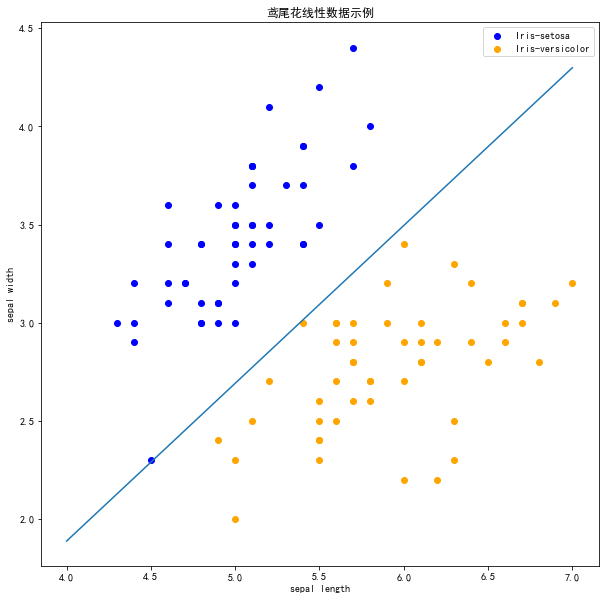

In [43]:
clf = Perceptron(fit_intercept=True, 
                 max_iter=1000,
                 tol=None,
                 shuffle=True)
clf.fit(X, y)

# 画布大小
plt.figure(figsize=(10,10))

# 中文标题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.title('鸢尾花线性数据示例')

plt.scatter(data[:50, 0], data[:50, 1], c='b', label='Iris-setosa',)
plt.scatter(data[50:100, 0], data[50:100, 1], c='orange', label='Iris-versicolor')

# 画感知机的线
x_ponits = np.arange(4, 8)
y_ = -(clf.coef_[0][0]*x_ponits + clf.intercept_)/clf.coef_[0][1]
plt.plot(x_ponits, y_)

# 其他部分
plt.legend()  # 显示图例
plt.grid(False)  # 不显示网格
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()